# Datathon 2023 - Lambda Team

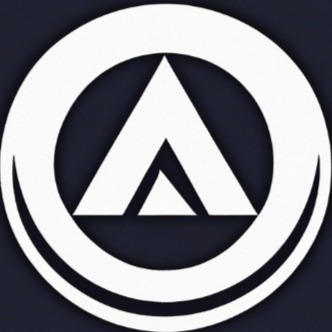

#### **Objectivo**
* **Objectivo General**: Predecir la frecuencia de los accidentes de vehículo a lo largo del tiempo. Y responder la pregunta: ¿Qué factores externos a las características del cliente afectan la frecuencia de los siniestros en auto?
* **Objectivo Especifico del Notebook**: Realizar manipulación y enriquecer nuestro dataset, con las informaciones suministradas y las datas externas obtenidas a lo largo del mismo.

# Libraries

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta

# Data ingestion

In [249]:
# Cargamos la data de la información del cliente, y la nombramos como df1
na_values = ['nan', 'NaN', ""]
df1 = pd.read_excel('data/Composicion de Cartera de clientes de Auto.xlsx', na_values=na_values)

In [250]:
# Capitalizamos las primeras letras de cada palabra, estandarizamos.
df1.columns = df1.columns.str.title().str.strip()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28486 entries, 0 to 28485
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Cd_Persona V2                  28486 non-null  int64         
 1   Tp_Documento                   28486 non-null  object        
 2   Cd_Sexo                        25121 non-null  object        
 3   Cd_Estado_Civil                25121 non-null  object        
 4   Rango De Edad                  28486 non-null  object        
 5   Tiempo Desde Registro (Meses)  28486 non-null  int64         
 6   In_Lista_Negra                 137 non-null    float64       
 7   Cd_Pais_Nacimiento             25485 non-null  object        
 8   Cd_Nacionalidad                26969 non-null  object        
 9   In_Inactivo                    6 non-null      float64       
 10  Fe_Inactivo                    6 non-null      datetime64[ns]
 11  In_Vip         

In [251]:
# Renombramos las variables
df1 = df1.rename(columns = {'Cd_Persona V2':'Codigo_Cliente',
                           'Rango De Edad':'Rango_Edad',
                           'Tiempo Desde Registro (Meses)':'Meses_Desde_Registro'})

df1.head()

,Codigo_Cliente,Tp_Documento,Cd_Sexo,Cd_Estado_Civil,Rango_Edad,Meses_Desde_Registro,In_Lista_Negra,Cd_Pais_Nacimiento,Cd_Nacionalidad,In_Inactivo,...,Cd_Provincia_Nacimiento,De_Act_Economica_Adicional,Cd_Sucursal_Envio,De_Sector,De_Ocupacion,De_Actividad,De_Ingreso_Anual,De_Profesion,De_Tipo_Persona,De_Provincia
0,240,RNC,NaN,NaN,,108,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,Industrial,0,0,0,0,Juridica,0
1,267,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
2,270,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
3,279,RNC,NaN,NaN,,1476,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
4,288,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0


Data cleaning operations

In [252]:
# Modifica los valores en la columna 'Tp_Documento': si son 'P', los cambia a 'PAS'
df1['Tp_Documento'] = np.where(df1['Tp_Documento']=="P","PAS",df1['Tp_Documento'])

# Rellena los valores faltantes en las columnas 'In_Lista_Negra' e 'In_Vip' con 0
df1['In_Lista_Negra'].fillna(0, inplace=True)
df1['In_Vip'].fillna(0, inplace=True)

# Calculamos el valor de la moda en la columna 'Cd_Pais_Nacimiento' y lo asigna a 'mode_value'
mode_value = df1['Cd_Pais_Nacimiento'].mode()[0] # DOM

# Rellena los valores faltantes en 'Cd_Pais_Nacimiento' con 'mode_value'
# También reemplaza 'nan' con 'mode_value' en la columna 'Cd_Pais_Nacimiento'
df1['Cd_Pais_Nacimiento'].fillna(mode_value, inplace=True)
df1['Cd_Pais_Nacimiento'] = np.where(df1['Cd_Pais_Nacimiento']=="nan", mode_value, df1['Cd_Pais_Nacimiento'])

df1['Cd_Provincia_Nacimiento'] = df1['Cd_Provincia_Nacimiento'].astype('Int64')
df1['Cd_Sucursal_Envio'] = df1['Cd_Sucursal_Envio'].astype('Int64')
df1['In_Inactivo'] = np.where(df1['In_Inactivo'].isna(), 0, df1['In_Inactivo'])
df1['In_Inactivo'] = df1['In_Inactivo'].astype(int)

mode_value = df1['Cd_Sexo'].mode()[0] 
df1['Cd_Sexo'] = np.where(df1['Cd_Sexo']=="nan", mode_value, df1['Cd_Sexo'])
df1['Cd_Sexo'] = np.where(df1['Cd_Sexo'].isna(), mode_value, df1['Cd_Sexo'])

df1.Tp_Documento.value_counts()

Tp_Documento
CED    24083
RNC     3368
PAS     1035
Name: count, dtype: int64

In [253]:
df1.loc[df1['Codigo_Cliente'] == 7668].T

,1521
Codigo_Cliente,7668
Tp_Documento,RNC
Cd_Sexo,M
Cd_Estado_Civil,NaN
Rango_Edad,
Meses_Desde_Registro,1476
In_Lista_Negra,0.0
Cd_Pais_Nacimiento,DOM
Cd_Nacionalidad,NaN
In_Inactivo,0


In [254]:
# Vemos los valores unicos que tenemos
df1['Codigo_Cliente'].nunique()

28486

#### Cargamos la data del historico de vehiculos

In [255]:
# La nombramos df2
df2 = pd.read_excel('data/Historico Auto y Caracteristicas de Vehiculo.xlsx', na_values=na_values)

In [256]:
# Estandarizamos
df2.columns = df2.columns.str.title().str.strip()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55707 entries, 0 to 55706
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cd_Persona V2     55707 non-null  int64 
 1   Poliza Id V2      55707 non-null  int64 
 2   Tipo_Vehiculo     55707 non-null  object
 3   Color             55707 non-null  object
 4   Marca             55707 non-null  object
 5   Modelo            55707 non-null  object
 6   Año               55707 non-null  int64 
 7   Tipo Transmision  55704 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.4+ MB


In [257]:
df2 = df2.rename(columns = {'Cd_Persona V2':'Codigo_Cliente',
                           'Poliza Id V2':'Codigo_Poliza',
                           'Tipo Transmision':'Tipo_Transmision'})

df2.head()

,Codigo_Cliente,Codigo_Poliza,Tipo_Vehiculo,Color,Marca,Modelo,Año,Tipo_Transmision
0,240,11473,Jeeps y Vanette,Blanco,LEXUS,RX350,2014,Automatico
1,240,11474,Camion,Blanco,MITSUBISHI,FUSO,2007,Sincronico_Camión
2,267,11475,Camioneta,Blanco,ISUZU,D-MAX,2008,Automatico
3,267,11476,Jeeps y Vanette,Blanco,TOYOTA,LAND CRUISER,2002,Automatico
4,267,11477,Furgoneta,Blanco,SHINERAY,MINI TRUCK,2018,Furgoneta_Sincronico


In [258]:
# Vemos los valores unicos
df2.Codigo_Cliente.nunique()

28519

In [259]:
# Vemos la distribucion por tipo de vehiculo
df2.Tipo_Vehiculo.value_counts()

Tipo_Vehiculo
Jeeps y Vanette                   24701
Automovil                         16201
Camioneta                          4456
Furgoneta                          2335
Camion                             1603
Camiones cama                      1515
Motocicleta                        1156
Cabezotes, Patanas y Tractores     1118
Minibus                             970
Autobus                             788
Maquinaria Pesada                   610
Remolque                            200
Volqueta                             46
Grua                                  4
Otros Tipos                           4
Name: count, dtype: int64

In [260]:
# Por marca
df2.Marca.value_counts()

Marca
HYUNDAI    8287
TOYOTA     7781
KIA        5114
HONDA      4404
FORD       4006
           ... 
ZEMAN         1
CHANNA        1
ROLATEC       1
AGY           1
TUCAN         1
Name: count, Length: 324, dtype: int64

#### Cargamos la data de Siniestros

In [261]:
# Lo nombramos df3
df3 = pd.read_excel('data/Historico de Siniestros.xlsx', na_values=na_values)

In [262]:
# Estandarizamos las variables
df3.columns = df3.columns.str.title().str.strip()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id _ Siniestro            18706 non-null  int64         
 1   Cd_Personav2              18706 non-null  int64         
 2   Fe_Ocurrencia             18706 non-null  datetime64[ns]
 3   Poliza Id V2              18706 non-null  int64         
 4   Cd_Provincia              18705 non-null  float64       
 5   Cd_Ciudad                 18705 non-null  float64       
 6   De_Lugar_Ocurrencia       18495 non-null  object        
 7   Nu_Siniestro_Relacionado  18706 non-null  object        
 8   In_Fraude                 18070 non-null  float64       
 9   De_Causa_Siniestro        18706 non-null  object        
 10  De_Causa_Detalle          18706 non-null  object        
 11  De_Provincia              18706 non-null  object        
 12  De_Ciudad         

In [263]:
# Renombramos las columnas
df3 = df3.rename(columns = {'Id _ Siniestro':'Codigo_Siniestro',
                           'Poliza Id V2':'Codigo_Poliza',
                           'Cd_Personav2':'Codigo_Cliente'})

df3.head()

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,De_Causa_Detalle,De_Provincia,De_Ciudad,Hora_Ocurrencia,Relacion_Reclamante,Evento_Catastrofico
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,Choque Simple,Distrito Nacional,Santo Domingo,17:15,0,0
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,Choque con Objeto,,,,,
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,Lesiones y/o Muerte Pasajero/Terceros/ Daños a...,,,,,
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,Robo Accesorio y/o Piezas,Distrito Nacional,Santo Domingo,16:30,0,0
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,Colision,,,,,


In [264]:
# Convierte la columna 'Fe_Ocurrencia' al formato de fecha y hora, tratando errores como valores no válidos
df3['Fe_Ocurrencia'] = pd.to_datetime(df3['Fe_Ocurrencia'], errors='coerce')

# Convierte la columna 'Hora_Ocurrencia' al formato de hora, extrayendo solo la parte de la hora
df3['Hora_Ocurrencia'] = pd.to_datetime(df3['Hora_Ocurrencia'], errors='coerce').dt.hour

# Reemplaza valores '0', ' ' y 0 en 'Relacion_Reclamante' con cadena vacía
df3['Relacion_Reclamante'] = np.where(df3['Relacion_Reclamante'].isin(["0"," ",0]),"",df3['Relacion_Reclamante'])

# Reemplaza valores '0', ' ' y 0 en 'Evento_Catastrofico' con cadena vacía
# También realiza reemplazos específicos de nombres de eventos
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(["0"," ",0]),"",df3['Evento_Catastrofico'])
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(['Huracán Elsa   02/04-Jul-2021']),"Huracán Elsa",df3['Evento_Catastrofico'])
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(['Vaguada 04-Nov-2022']),"Vaguada Nov 2022",df3['Evento_Catastrofico'])

# Reemplaza valores nulos en 'In_Fraude' con '0' y convierte la columna a tipo de dato float
df3['In_Fraude'] = np.where(df3['In_Fraude'].isna(),"0",df3['In_Fraude'])
df3['In_Fraude'] = df3['In_Fraude'].astype(float)

C:\Users\Aneur\AppData\Local\Temp\ipykernel_21668\55535621.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Hora_Ocurrencia'] = pd.to_datetime(df3['Hora_Ocurrencia'], errors='coerce').dt.hour


In [265]:
# Conocemos nuestro dataframe
df3.Fe_Ocurrencia.sort_values().value_counts()

Fe_Ocurrencia
2022-11-04    57
2018-07-10    22
2018-02-20    17
2017-11-08    16
2017-02-23    16
              ..
2020-11-05     1
2015-05-28     1
2015-05-16     1
2015-05-15     1
2014-07-05     1
Name: count, Length: 3118, dtype: int64

In [266]:
# Vemos las causas de los siniestros
df3.De_Causa_Siniestro.value_counts()

De_Causa_Siniestro
Accidente/Choque                            12935
Rotura de Vidrios y/o Parabrisas             2910
Responsabilidad Civil Personas o Cosas       2048
Robo o Hurto Accesorios/ Partes o Piezas      349
No Registrado                                 229
Hechos de la Naturaleza                       114
Daños Maliciosos al Vehículo/APOV              99
Robo o Hurto  Vehiculo                         22
Name: count, dtype: int64

In [267]:
df3.De_Causa_Detalle.value_counts()

De_Causa_Detalle
Colision                                                                   8395
0                                                                          3159
Choque Simple                                                              2791
Daños a la Propiedad de Terceros                                           1750
Choque Estacionado                                                          898
Choque con Objeto                                                           605
Robo  Accesorio y/o Piezas                                                  259
Lesiones y/o Muerte Pasajero/Terceros/ Daños a la Propiedad de Terceros     177
Choque con Lesionado                                                        153
Lesiones y/o Muerte a  Terceros                                             112
Hurto  Accesorio y/o Piezas                                                  90
Vandalismo                                                                   88
Inundacion y/o Ras de M

In [268]:
# Vemos los valores unicos
df3.Codigo_Cliente.nunique()

8778

In [269]:
df3.shape

(18706, 16)

In [270]:
df3.columns

Index(['Codigo_Siniestro', 'Codigo_Cliente', 'Fe_Ocurrencia', 'Codigo_Poliza',
       'Cd_Provincia', 'Cd_Ciudad', 'De_Lugar_Ocurrencia',
       'Nu_Siniestro_Relacionado', 'In_Fraude', 'De_Causa_Siniestro',
       'De_Causa_Detalle', 'De_Provincia', 'De_Ciudad', 'Hora_Ocurrencia',
       'Relacion_Reclamante', 'Evento_Catastrofico'],
      dtype='object')

## Integrate given datasets

Como nuestro dataset objectivo es el df3, que tienen los siniestros, lo enriquecemos con los dos primeros df para agregar información adicional a cada siniestro.

In [271]:
df3 = df3.merge(df1, on = ['Codigo_Cliente'], how = 'left')
df3 = df3.merge(df2, on = ['Codigo_Cliente','Codigo_Poliza'], how = 'left')

In [272]:
df3.columns

Index(['Codigo_Siniestro', 'Codigo_Cliente', 'Fe_Ocurrencia', 'Codigo_Poliza',
       'Cd_Provincia', 'Cd_Ciudad', 'De_Lugar_Ocurrencia',
       'Nu_Siniestro_Relacionado', 'In_Fraude', 'De_Causa_Siniestro',
       'De_Causa_Detalle', 'De_Provincia_x', 'De_Ciudad', 'Hora_Ocurrencia',
       'Relacion_Reclamante', 'Evento_Catastrofico', 'Tp_Documento', 'Cd_Sexo',
       'Cd_Estado_Civil', 'Rango_Edad', 'Meses_Desde_Registro',
       'In_Lista_Negra', 'Cd_Pais_Nacimiento', 'Cd_Nacionalidad',
       'In_Inactivo', 'Fe_Inactivo', 'In_Vip', 'Cd_Provincia_Nacimiento',
       'De_Act_Economica_Adicional', 'Cd_Sucursal_Envio', 'De_Sector',
       'De_Ocupacion', 'De_Actividad', 'De_Ingreso_Anual', 'De_Profesion',
       'De_Tipo_Persona', 'De_Provincia_y', 'Tipo_Vehiculo', 'Color', 'Marca',
       'Modelo', 'Año', 'Tipo_Transmision'],
      dtype='object')

# EDA

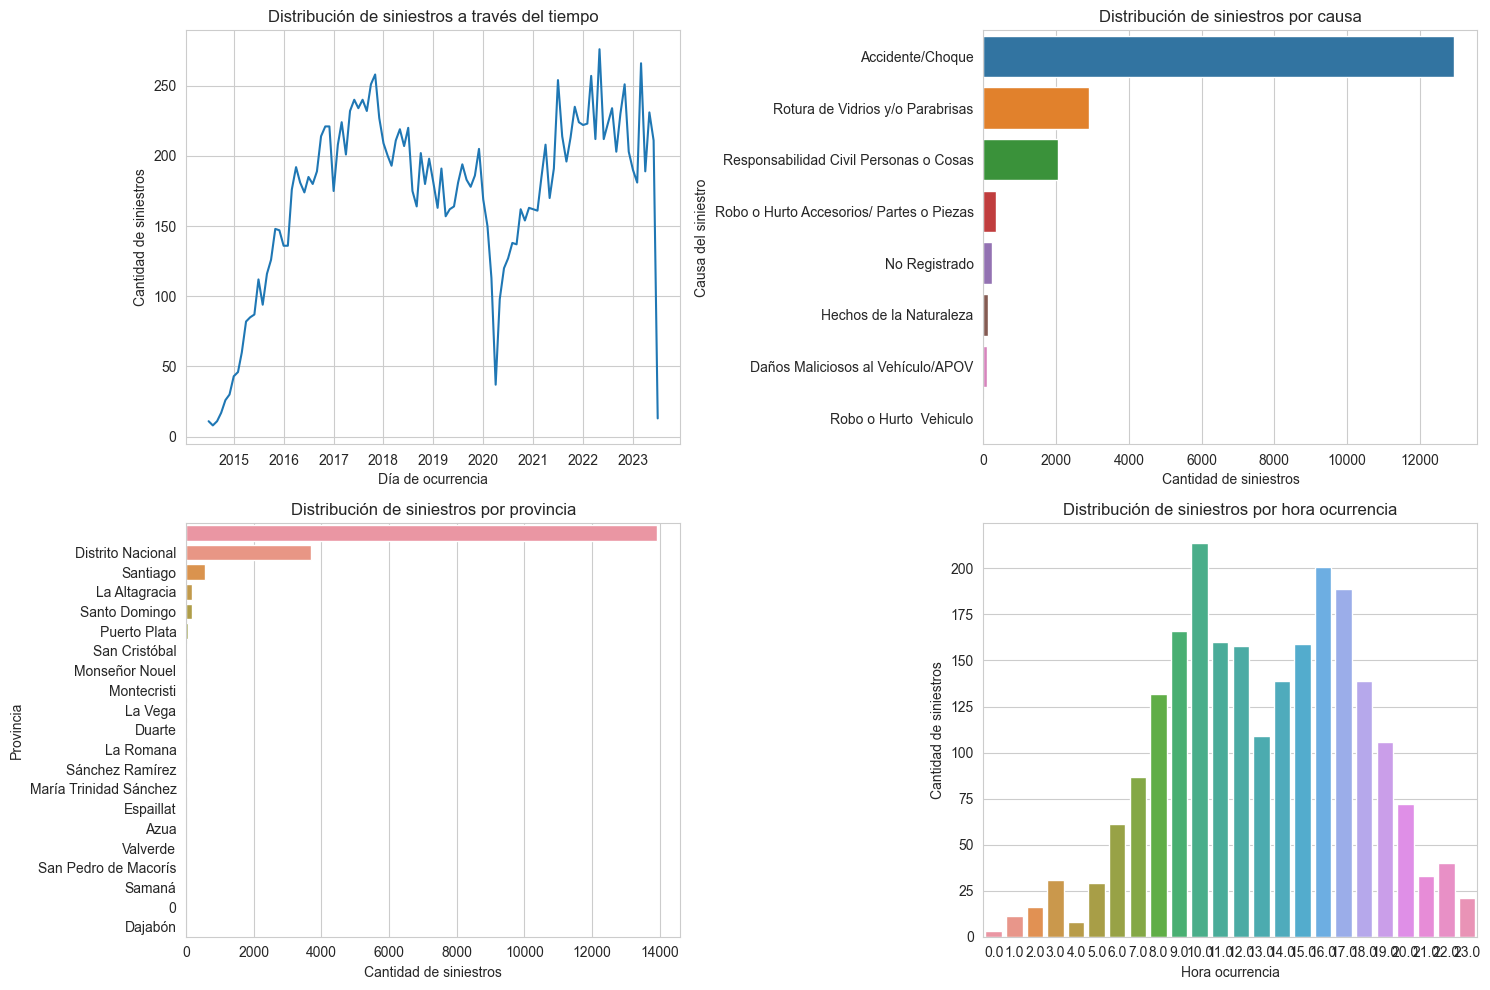

In [316]:
data = df3.copy()

# Elimina filas con valores faltantes en la columna 'Fe_Ocurrencia' para fines de visual
data_clean = data.dropna(subset=['Fe_Ocurrencia'])
data_clean['month'] = data['Fe_Ocurrencia'].dt.to_period('M')
monthly_counts_clean = data_clean.groupby('month').size()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of claims over time
sns.lineplot(x=monthly_counts_clean.index.to_timestamp(), y=monthly_counts_clean.values, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de siniestros a través del tiempo')
axs[0, 0].set_xlabel('Día de ocurrencia')
axs[0, 0].set_ylabel('Cantidad de siniestros')

# Plot the distribution of claims by cause
sns.countplot(data=data_clean, y='De_Causa_Siniestro', ax=axs[0, 1], order=data_clean['De_Causa_Siniestro'].value_counts().index)
axs[0, 1].set_title('Distribución de siniestros por causa')
axs[0, 1].set_xlabel('Cantidad de siniestros')
axs[0, 1].set_ylabel('Causa del siniestro')

# Plot the distribution of claims by province
sns.countplot(data=data_clean, y='De_Provincia_x', ax=axs[1, 0], order=data_clean['De_Provincia_x'].value_counts().index)
axs[1, 0].set_title('Distribución de siniestros por provincia')
axs[1, 0].set_xlabel('Cantidad de siniestros')
axs[1, 0].set_ylabel('Provincia')

# Plot the distribution of claims by hour of occurrence
sns.countplot(data=data_clean, x='Hora_Ocurrencia', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de siniestros por hora ocurrencia')
axs[1, 1].set_xlabel('Hora ocurrencia')
axs[1, 1].set_ylabel('Cantidad de siniestros')

# Show the plots
plt.tight_layout()
plt.show()


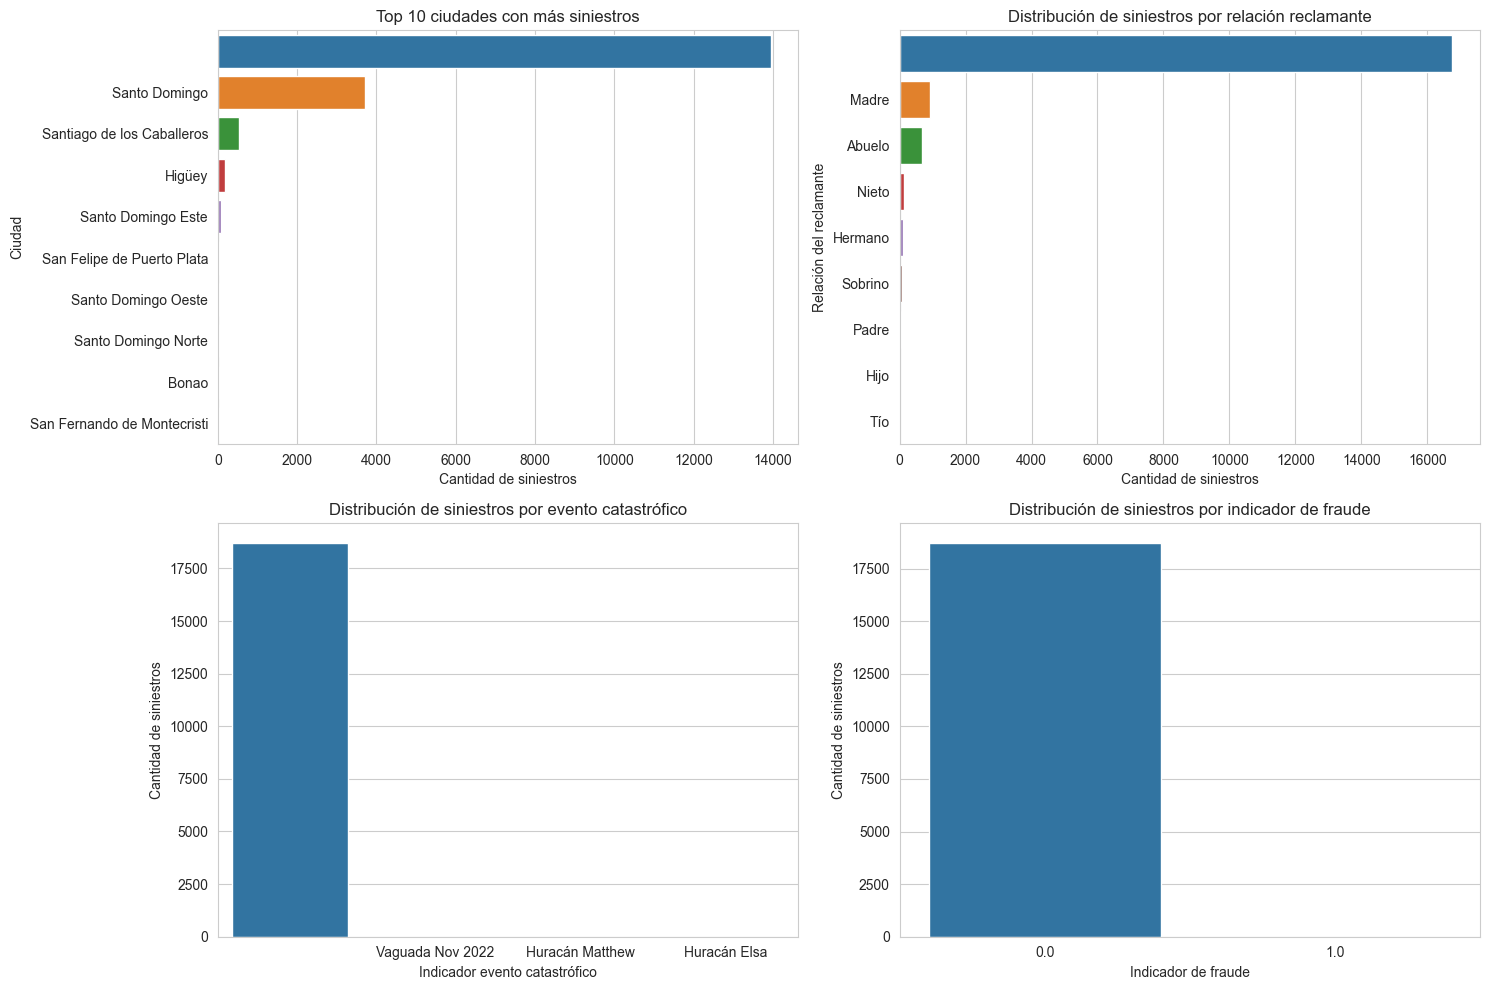

In [314]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of claims by city
sns.countplot(data=data_clean, y='De_Ciudad', ax=axs[0, 0], order=data_clean['De_Ciudad'].value_counts().iloc[:10].index)
axs[0, 0].set_title('Top 10 ciudades con más siniestros')
axs[0, 0].set_xlabel('Cantidad de siniestros')
axs[0, 0].set_ylabel('Ciudad')

# Plot the distribution of claims by relationship of the claimant
sns.countplot(data=data_clean, y='Relacion_Reclamante', ax=axs[0, 1], order=data_clean['Relacion_Reclamante'].value_counts().index)
axs[0, 1].set_title('Distribución de siniestros por relación reclamante')
axs[0, 1].set_xlabel('Cantidad de siniestros')
axs[0, 1].set_ylabel('Relación del reclamante')

# Plot the distribution of claims by catastrophic events
sns.countplot(data=data_clean, x='Evento_Catastrofico', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de siniestros por evento catastrófico')
axs[1, 0].set_xlabel('Indicador evento catastrófico')
axs[1, 0].set_ylabel('Cantidad de siniestros')

# Plot the distribution of claims by fraud indicator
sns.countplot(data=data_clean, x='In_Fraude', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de siniestros por indicador de fraude')
axs[1, 1].set_xlabel('Indicador de fraude')
axs[1, 1].set_ylabel('Cantidad de siniestros')

# Show the plots
plt.tight_layout()
plt.show()

# Agregamos variables externas para enriquecer nuestro dataset

## Add parque vehicular

Fuente: Dirección General de Aduanas (2014 - 2023). Estadísticas Parque Vehicular.dgii.gov.do/estadisticas/parqueVehicular/Paginas/default.aspx

In [275]:
parque_vehicular = pd.read_excel('data/Parque Vehicular 2014 - 2023.xlsx', na_values=na_values)

# Cambia el nombre de la columna "Cantidad" a "Cantidad_Parque_Vehicular"
parque_vehicular.rename(columns={"Cantidad":"Cantidad_Parque_Vehicular"}, inplace=True)

# Crea una columna 'ano' que contiene el año extraído de la columna 'Periodo' en formato de año ('YYYY')
parque_vehicular['ano'] = parque_vehicular['Periodo'].dt.strftime('%Y')
parque_vehicular.drop(columns="Periodo",inplace=True)
parque_vehicular.head()

,Clase,Cantidad_Parque_Vehicular,ano
0,Motocicletas,3191930,2023
1,Jeep,653866,2023
2,Automoviles,1105668,2023
3,Carga,510916,2023
4,Autobuses,127360,2023


In [276]:
# Vemos el tipo de datos
parque_vehicular.dtypes

Clase                        object
Cantidad_Parque_Vehicular     int64
ano                          object
dtype: object

In [277]:
def replace_values(df, column, replacements):
    """
     Función para reemplazar valores en una columna específica de un DataFrame
    """
    for old_value, new_value in replacements.items():
        df[column] = np.where(df[column] == old_value, new_value, df[column])
    return df

# Define diccionarios de reemplazo para cada DataFrame
parque_vehicular_replacements = {
    "Motocicletas": "Motocicleta",
    "Autobuses": "Autobus",
    "Automoviles": "Automovil",
    "Maquinas Pesadas": "Maquinaria Pesada",
    "Volteo": "Maquinaria Pesada"
}

df3_replacements = {
    "Jeeps y Vanette": "Jeep",
    "Otros Tipos": "Otros",
    "Minibus": "Autobus",
    "Grua": "Carga",
    "Remolque": "Carga",
    "Volqueta": "Carga",
    "Camion": "Carga",
    "Furgoneta": "Carga",
    "Cabezotes, Patanas y Tractores": "Carga",
    "Camiones cama": "Carga",
    "Camioneta": "Jeep"
}

# Aplica la función de reemplazo a cada DataFrame
parque_vehicular = replace_values(parque_vehicular, 'Clase', parque_vehicular_replacements)
df3 = replace_values(df3, 'Tipo_Vehiculo', df3_replacements)

# Reemplaza los valores nulos en 'Tipo_Vehiculo' con el valor de moda
mode_value = df3['Tipo_Vehiculo'].mode()[0]
df3['Tipo_Vehiculo'].fillna(mode_value, inplace=True)

In [278]:
# Vemos como se distribuye el parque vehicular
parque_vehicular.Clase.unique()

array(['Motocicleta', 'Jeep', 'Automovil', 'Carga', 'Autobus',
       'Maquinaria Pesada', 'Otros'], dtype=object)

In [279]:
df3.Tipo_Vehiculo.unique()

array(['Automovil', 'Jeep', 'Carga', 'Autobus', 'Maquinaria Pesada',
       'Motocicleta', 'Otros'], dtype=object)

Automóviles incluye Privados, públicos urbanos e interurbanos 

Carga incluye camiones y camionetas

Otros incluye remolques, ambulancias, montacargas y fúnebres

In [280]:
# Agrega una columna 'ano' al DataFrame df3 que contiene el año extraído de la columna 'Fe_Ocurrencia'
df3['ano'] = df3['Fe_Ocurrencia'].dt.strftime('%Y')

# Fusion con df3 con el DataFrame parque_vehicular utilizando las columnas 'Tipo_Vehiculo' y 'ano' como claves de fusión
# Agrega las columnas de parque_vehicular al resultado
df4 = df3.merge(parque_vehicular, left_on=["Tipo_Vehiculo","ano"], right_on=["Clase","ano"], how='left')
df4.shape

(18743, 46)

In [281]:
df4.isnull().sum()

Codigo_Siniestro                  0
Codigo_Cliente                    0
Fe_Ocurrencia                     0
Codigo_Poliza                     0
Cd_Provincia                      1
Cd_Ciudad                         1
De_Lugar_Ocurrencia             212
Nu_Siniestro_Relacionado          0
In_Fraude                         0
De_Causa_Siniestro                0
De_Causa_Detalle                  0
De_Provincia_x                    0
De_Ciudad                         0
Hora_Ocurrencia               16449
Relacion_Reclamante               0
Evento_Catastrofico               0
Tp_Documento                    199
Cd_Sexo                         199
Cd_Estado_Civil                6023
Rango_Edad                      199
Meses_Desde_Registro            199
In_Lista_Negra                  199
Cd_Pais_Nacimiento              199
Cd_Nacionalidad                4351
In_Inactivo                     199
Fe_Inactivo                   18741
In_Vip                          199
Cd_Provincia_Nacimiento     

# Add whether or not it was weekend

Fuente: Meteostat. [https://dev.meteostat.net/python/hourly.html#example]

In [282]:
# Agregamos una nueva columna 'Tipo_Dia' con el valor 'Weekday' en todo el DataFrame df4
df4['Tipo_Dia'] = 'Weekday'
df4.loc[df4['Fe_Ocurrencia'].dt.weekday > 4, 'Tipo_Dia'] = 'Weekend'
df4

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,Tipo_Vehiculo,Color,Marca,Modelo,Año,Tipo_Transmision,ano,Clase,Cantidad_Parque_Vehicular,Tipo_Dia
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,Automovil,Blanco,TOYOTA,CAMRY,2001.0,CE - Automatico,2015,Automovil,773019,Weekday
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,Jeep,Rojo,KIA,SPORTAGE,2015.0,4x4 - Automatico,2016,Jeep,386706,Weekday
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,Carga,Blanco,DAIHATSU,DELTA,2007.0,Sincronico,2016,Carga,405292,Weekday
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,Jeep,NaN,NaN,NaN,NaN,NaN,2016,Jeep,386706,Weekday
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,Jeep,Blanco,TOYOTA,PRADO,2013.0,%Sincronico,2016,Jeep,386706,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Jeep,Blanco,JEEP,WRANGLER,2023.0,Renegade 4x4 - Automatico,2023,Jeep,653866,Weekday
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,Jeep,Blanco,ISUZU,D-MAX,2015.0,Automatico,2023,Jeep,653866,Weekend
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Jeep,Azul,HYUNDAI,TUCSON,2014.0,GL - Automatico,2023,Jeep,653866,Weekday
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,Jeep,Gris,TOYOTA,HILUX,2023.0,Cabina Sencilla Pick-Up 4x4 - Sincronico,2023,Jeep,653866,Weekday


<Axes: xlabel='ano', ylabel='count'>

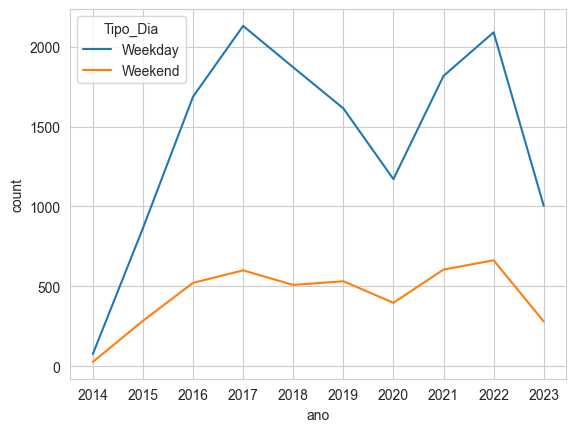

In [283]:
# Vemos un grafico rapido por año y tipo de día (Weekday o Weekend), calcula el tamaño de cada grupo y reinicia los índices
grouped_data = df4.groupby(['ano', 'Tipo_Dia']).size().reset_index(name='count')
sns.lineplot(data=grouped_data, x='ano', y='count', hue='Tipo_Dia')

<Axes: xlabel='ano', ylabel='count'>

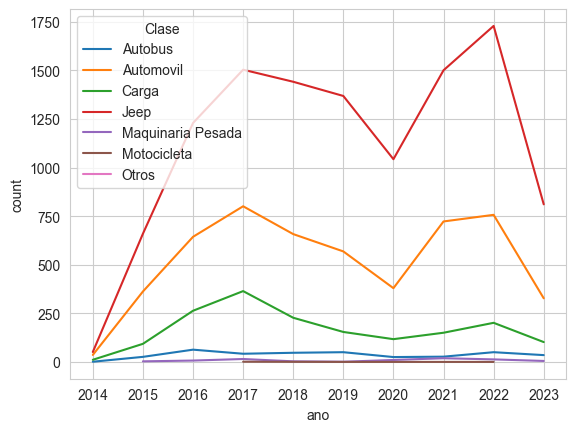

In [284]:
# Agrupar los datos por año y Clase, calculando el recuento de cada grupo
grouped_data = df4.groupby(['ano', 'Clase']).size().reset_index(name='count')
sns.lineplot(data=grouped_data, x='ano', y='count', hue='Clase')

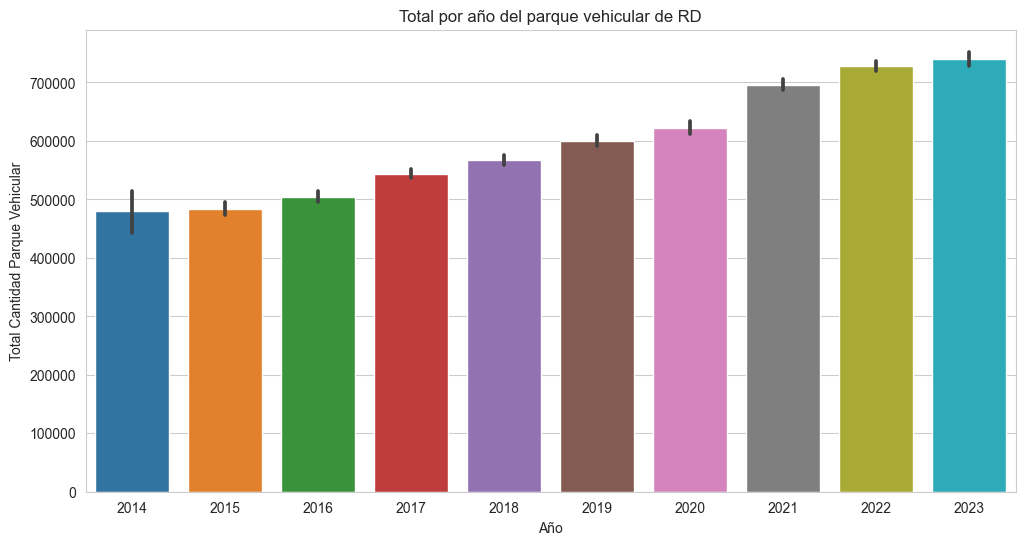

In [313]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

order = sorted(df4['ano'].unique())
sns.barplot(x='ano', y='Cantidad_Parque_Vehicular', data=df4, order=order)
plt.title('Total por año del parque vehicular de RD')
plt.xlabel('Año')
plt.ylabel('Total Cantidad Parque Vehicular')
plt.show()

# Add holidays

Fuente: Ministerio de Trabajo (2014 - 2023). Días Festivos. www.mt.gob.do

In [286]:
# Cargamos los datos del archivo Excel y crea un DataFrame llamado 'dias_fiesta'
dias_fiesta = pd.read_excel('data/Dias Feriados 2014 - 2023.xlsx')
dias_fiesta['dia_feriado'] = 1
dias_fiesta

,Feriado,Fecha_Celebrada,dia_feriado
0,Año Nuevo,2023-01-02,1
1,Dia de Reyes,2023-01-09,1
2,Dia de la Altagracia,2023-01-21,1
3,Dia de Duarte,2023-01-30,1
4,Dia de la Independencia,2023-02-27,1
...,...,...,...
115,Corpus Christi,2014-06-19,1
116,Dia de la Restauracion,2014-08-16,1
117,Dia de las Mercedes,2014-09-24,1
118,Dia de la Constitucion,2014-11-10,1


In [287]:
# Combinamos los datos de df4 y dias_fiesta utilizando la columna 'Fe_Ocurrencia' como clave
df5 = df4.merge(dias_fiesta[['Fecha_Celebrada','dia_feriado']], how='left',left_on='Fe_Ocurrencia',right_on='Fecha_Celebrada')

# Rellenar los valores faltantes en la columna 'dia_feriado' con 0
df5['dia_feriado'] = df5['dia_feriado'].fillna(0)

# Eliminar la columna 'Fecha_Celebrada' del DataFrame df5
del df5['Fecha_Celebrada']
df5

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,Color,Marca,Modelo,Año,Tipo_Transmision,ano,Clase,Cantidad_Parque_Vehicular,Tipo_Dia,dia_feriado
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,Blanco,TOYOTA,CAMRY,2001.0,CE - Automatico,2015,Automovil,773019,Weekday,0.0
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,Rojo,KIA,SPORTAGE,2015.0,4x4 - Automatico,2016,Jeep,386706,Weekday,0.0
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,Blanco,DAIHATSU,DELTA,2007.0,Sincronico,2016,Carga,405292,Weekday,0.0
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,NaN,NaN,NaN,NaN,NaN,2016,Jeep,386706,Weekday,0.0
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,Blanco,TOYOTA,PRADO,2013.0,%Sincronico,2016,Jeep,386706,Weekday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Blanco,JEEP,WRANGLER,2023.0,Renegade 4x4 - Automatico,2023,Jeep,653866,Weekday,0.0
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,Blanco,ISUZU,D-MAX,2015.0,Automatico,2023,Jeep,653866,Weekend,0.0
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Azul,HYUNDAI,TUCSON,2014.0,GL - Automatico,2023,Jeep,653866,Weekday,0.0
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,Gris,TOYOTA,HILUX,2023.0,Cabina Sencilla Pick-Up 4x4 - Sincronico,2023,Jeep,653866,Weekday,0.0


In [288]:
df5.dia_feriado.unique()

array([0., 1.])

# Add lugar de ocurrencia

Fuente: Get_Location_Data.ipynb

En este documento se presenta la agrupación de la categoría y el proceso de identificación de la longitud y latitud. Se utilizó la API de Google para generar las coordenadas de longitud y latitud correspondientes al lugar de ocurrencia.

In [289]:
# Cargamos nuestra base de datos.
latlon_data = pd.read_excel("data/lon_lat_data.xlsx")
latlon_data.head()

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,MOD_Lugar_Ocurrencia,De_Provincia,De_Ciudad,Categoria_Lugar,latitude,longitude,PROVINCIA
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,siniestro reportado via cover,Distrito Nacional,Santo Domingo,Otro,18.489610,-69.932672,DISTRITO NACIONAL
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,c mayaguez urb villas dumit,NaN,NaN,Otro,18.735693,-70.162651,SAN CRISTOBAL
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,barahora,NaN,NaN,Otro,18.212081,-71.102408,BARAHONA
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,arroyo hondo ii,Distrito Nacional,Santo Domingo,Otro,18.486257,-69.928257,DISTRITO NACIONAL
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,avenida gustavo mejia ricart,NaN,NaN,Avenida,18.470057,-69.945025,DISTRITO NACIONAL


In [290]:
# Realizamos una fusión (merge) entre los DataFrames df5 y latlon_data
# Usamos una selección de columnas específicas de latlon_data y eliminamos duplicados
# Luego, unimos estos datos con df5 en las columnas correspondientes
df6 = df5.merge(latlon_data[['De_Lugar_Ocurrencia','latitude',
                             'longitude','PROVINCIA','Codigo_Cliente',
                             'Codigo_Siniestro','Fe_Ocurrencia','Codigo_Poliza',
                             "Cd_Provincia",'Cd_Ciudad','Categoria_Lugar']].drop_duplicates(),
                how='left',
                on=['De_Lugar_Ocurrencia','Codigo_Cliente',
                    'Codigo_Siniestro','Fe_Ocurrencia',
                    'Codigo_Poliza','Cd_Provincia','Cd_Ciudad'])
df6

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,Tipo_Transmision,ano,Clase,Cantidad_Parque_Vehicular,Tipo_Dia,dia_feriado,latitude,longitude,PROVINCIA,Categoria_Lugar
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,CE - Automatico,2015,Automovil,773019,Weekday,0.0,18.489610,-69.932672,DISTRITO NACIONAL,Otro
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,4x4 - Automatico,2016,Jeep,386706,Weekday,0.0,18.735693,-70.162651,SAN CRISTOBAL,Otro
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,Sincronico,2016,Carga,405292,Weekday,0.0,18.212081,-71.102408,BARAHONA,Otro
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,NaN,2016,Jeep,386706,Weekday,0.0,18.486257,-69.928257,DISTRITO NACIONAL,Otro
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,%Sincronico,2016,Jeep,386706,Weekday,0.0,18.470057,-69.945025,DISTRITO NACIONAL,Avenida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Renegade 4x4 - Automatico,2023,Jeep,653866,Weekday,0.0,18.490774,-69.982795,SANTO DOMINGO,Autopista
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,Automatico,2023,Jeep,653866,Weekend,0.0,18.524213,-70.020341,SANTO DOMINGO,Otro
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,GL - Automatico,2023,Jeep,653866,Weekday,0.0,18.490774,-69.982795,SANTO DOMINGO,Autopista
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,Cabina Sencilla Pick-Up 4x4 - Sincronico,2023,Jeep,653866,Weekday,0.0,18.493735,-69.937733,DISTRITO NACIONAL,Calle


# Add weather condition

Fuente: https://dev.meteostat.net/formats.html#time-format

In [291]:
weather_condition = pd.read_excel("data/Gr Coco.xlsx")
weather_condition

,Date,Descripcion,Coco
0,2014-07-01,Barahona,7
1,2014-07-01,La Altagracia,7
2,2014-07-01,La Romana,5
3,2014-07-01,Puerto Plata,3
4,2014-07-01,Santiago,3
...,...,...,...
39593,2023-08-29,Puerto Plata,3
39594,2023-08-29,San Cristobal,3
39595,2023-08-29,San Juan,2
39596,2023-08-29,Santiago,2


Dictionary of the Weather Condition Codes (`Coco`) values:

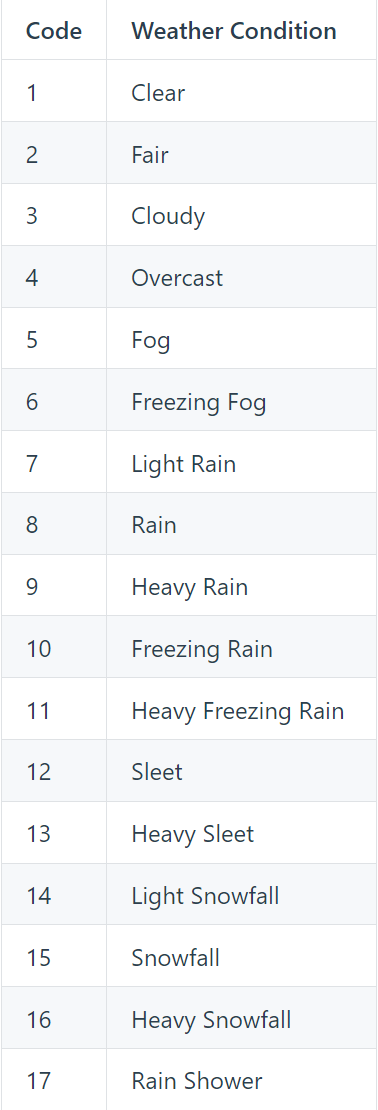
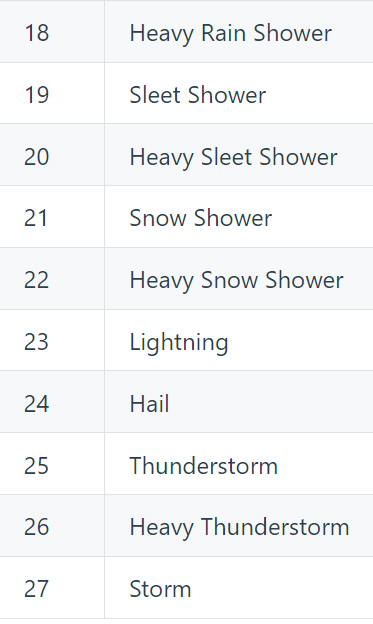

In [292]:
# Normalized weather conditions to reduce cardinality
conversion_factor = {2.0: "Clima_Fair",
                    7.0: "Clima_Rain",
                    3.0: "Clima_Cloudy",
                    25.0: "Clima_Thunderstorm",
                    5.0: "Clima_Fog",
                    18.0: "Clima_Rain",
                    4.0: "Clima_Cloudy",
                    8.0: "Clima_Rain",
                    0.0: "Clima_Fair",
                    1.0: "Clima_Fair",
                    27.0: "Clima_Thunderstorm",
                    17.0: "Clima_Rain",
                    9.0: "Clima_Rain",
                    26.0: "Clima_Thunderstorm"}

In [293]:
# Mapeamos los valores de la columna 'Coco' utilizando el diccionario 'conversion_factor'
# y almacenamos los resultados en una nueva columna llamada 'weather_condition' en el DataFrame 'weather_condition'
weather_condition['weather_condition'] = weather_condition['Coco'].map(conversion_factor)
weather_condition

,Date,Descripcion,Coco,weather_condition
0,2014-07-01,Barahona,7,Clima_Rain
1,2014-07-01,La Altagracia,7,Clima_Rain
2,2014-07-01,La Romana,5,Clima_Fog
3,2014-07-01,Puerto Plata,3,Clima_Cloudy
4,2014-07-01,Santiago,3,Clima_Cloudy
...,...,...,...,...
39593,2023-08-29,Puerto Plata,3,Clima_Cloudy
39594,2023-08-29,San Cristobal,3,Clima_Cloudy
39595,2023-08-29,San Juan,2,Clima_Fair
39596,2023-08-29,Santiago,2,Clima_Fair


In [294]:
weather_condition.weather_condition.nunique()

5

In [295]:
# Seleccionamos las columnas 'Date' y 'Descripcion' del DataFrame 'weather_condition'
weather_df = weather_condition[['Date', 'Descripcion']]

# Generamos columnas dummy a partir de la columna 'weather_condition' utilizando one-hot encoding
weather_condition2 = pd.get_dummies(weather_condition['weather_condition'])
weather_condition2 = pd.concat([weather_df, weather_condition2], axis=1)

# Seleccionamos las columnas que deseamos convertir a tipo de dato entero
cols_to_convert = weather_condition2.columns[-5:]

weather_condition2[cols_to_convert] = weather_condition2[cols_to_convert].astype(int)
weather_condition2['Descripcion'] = weather_condition2['Descripcion'].str.upper()
weather_condition2

,Date,Descripcion,Clima_Cloudy,Clima_Fair,Clima_Fog,Clima_Rain,Clima_Thunderstorm
0,2014-07-01,BARAHONA,0,0,0,1,0
1,2014-07-01,LA ALTAGRACIA,0,0,0,1,0
2,2014-07-01,LA ROMANA,0,0,1,0,0
3,2014-07-01,PUERTO PLATA,1,0,0,0,0
4,2014-07-01,SANTIAGO,1,0,0,0,0
...,...,...,...,...,...,...,...
39593,2023-08-29,PUERTO PLATA,1,0,0,0,0
39594,2023-08-29,SAN CRISTOBAL,1,0,0,0,0
39595,2023-08-29,SAN JUAN,0,1,0,0,0
39596,2023-08-29,SANTIAGO,0,1,0,0,0


In [296]:
# Realizamos una fusión (merge) entre los DataFrames df6 y weather_condition2
# Utilizamos las columnas "Date" y "Descripcion" como claves de unión
df7 = df6.merge(weather_condition2,
                how='left',
                right_on=["Date","Descripcion"],
                left_on=["Fe_Ocurrencia","PROVINCIA"])
cols_to_convert = df7.columns[-5:]
df7[cols_to_convert] = df7[cols_to_convert].fillna(0)
df7

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,longitude,PROVINCIA,Categoria_Lugar,Date,Descripcion,Clima_Cloudy,Clima_Fair,Clima_Fog,Clima_Rain,Clima_Thunderstorm
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,-69.932672,DISTRITO NACIONAL,Otro,2015-05-29,DISTRITO NACIONAL,1.0,0.0,0.0,0.0,0.0
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,-70.162651,SAN CRISTOBAL,Otro,2016-02-12,SAN CRISTOBAL,0.0,1.0,0.0,0.0,0.0
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,-71.102408,BARAHONA,Otro,2016-02-09,BARAHONA,0.0,0.0,0.0,1.0,0.0
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,-69.928257,DISTRITO NACIONAL,Otro,2016-02-15,DISTRITO NACIONAL,0.0,0.0,0.0,1.0,0.0
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,-69.945025,DISTRITO NACIONAL,Avenida,2016-02-03,DISTRITO NACIONAL,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,-69.982795,SANTO DOMINGO,Autopista,2023-04-04,SANTO DOMINGO,0.0,1.0,0.0,0.0,0.0
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,-70.020341,SANTO DOMINGO,Otro,2023-06-03,SANTO DOMINGO,1.0,0.0,0.0,0.0,0.0
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,-69.982795,SANTO DOMINGO,Autopista,2023-05-22,SANTO DOMINGO,0.0,0.0,0.0,1.0,0.0
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,-69.937733,DISTRITO NACIONAL,Calle,2023-06-01,DISTRITO NACIONAL,0.0,0.0,0.0,1.0,0.0


# Add daily temperature

Fuente: https://dev.meteostat.net/formats.html#time-format

In [297]:
# Leemos un archivo Excel llamado "MeteostatData_Diaria.xlsx"
# y almacenamos su contenido en un DataFrame llamado 'temperature_daily'
temperature_daily = pd.read_excel("data/MeteostatData_Diaria.xlsx")
temperature_daily

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,DESCRIPCION,LON,LAT
0,2014-07-01,28.3,26.0,32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.485573,-69.931946
1,2014-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.485573,-69.931946
2,2014-07-03,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.485573,-69.931946
3,2014-07-04,26.9,25.3,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.485573,-69.931946
4,2014-07-05,28.9,25.2,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.485573,-69.931946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37494,2023-08-22,28.1,25.6,31.7,NaN,NaN,21.0,9.4,NaN,1010.2,NaN,SANTO DOMINGO,18.557195,-69.898130
37495,2023-08-23,28.1,25.7,31.2,NaN,NaN,43.0,7.4,NaN,1010.9,NaN,SANTO DOMINGO,18.557195,-69.898130
37496,2023-08-24,28.5,25.8,31.6,NaN,NaN,73.0,6.8,NaN,1011.9,NaN,SANTO DOMINGO,18.557195,-69.898130
37497,2023-08-25,29.1,26.3,32.2,NaN,NaN,29.0,7.7,NaN,1013.2,NaN,SANTO DOMINGO,18.557195,-69.898130


In [298]:
temperature_daily.isnull().sum()

time               0
tavg            1876
tmin            2665
tmax            2665
prcp           19755
snow           37499
wdir           15186
wspd            8474
wpgt           37499
pres           12495
tsun           37499
DESCRIPCION        0
LON                0
LAT                0
dtype: int64

count    35623.000000
mean        26.325717
std          1.960720
min         19.200000
25%         24.900000
50%         26.400000
75%         27.700000
max         34.500000
Name: tavg, dtype: float64


C:\Users\Aneur\AppData\Local\Temp\ipykernel_21668\2926289102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(temperature_daily.tavg)


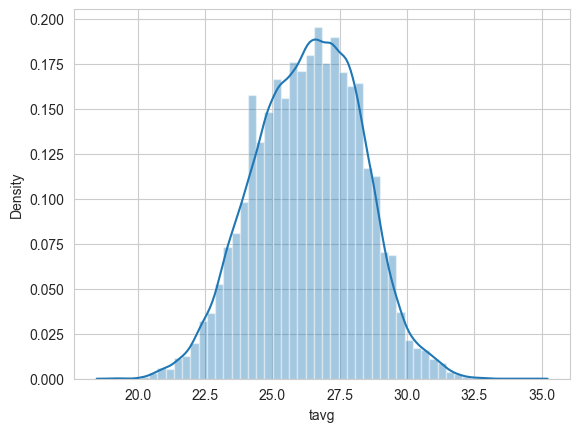

In [299]:
print(temperature_daily.tavg.describe())
ax = sns.distplot(temperature_daily.tavg)

Interpolate missing values with the most recent lagged version of the same variable.

In [300]:
temperature_daily2 = temperature_daily.copy()
temperature_daily2.sort_values(by= "time")
# Interpolate missing values in the 'tavg' column within each group defined by the 'DESCRIPCION' column

# Average Temperature
temperature_daily2['tavg'] = temperature_daily2.groupby('DESCRIPCION')['tavg'].fillna(method='ffill')
temperature_daily2['tavg'] = temperature_daily2.groupby('DESCRIPCION')['tavg'].fillna(method='bfill')
# Total Precipitation
temperature_daily2['prcp'] = temperature_daily2.groupby('DESCRIPCION')['prcp'].fillna(method='ffill')
temperature_daily2['prcp'] = temperature_daily2.groupby('DESCRIPCION')['prcp'].fillna(method='bfill')
temperature_daily2['prcp'] = temperature_daily2.groupby('DESCRIPCION')['prcp'].fillna('mean')
# Wind (From) Direction
temperature_daily2['wdir'] = temperature_daily2.groupby('DESCRIPCION')['wdir'].fillna(method='ffill')
temperature_daily2['wdir'] = temperature_daily2.groupby('DESCRIPCION')['wdir'].fillna(method='bfill')
# Average Wind Speed
temperature_daily2['wspd'] = temperature_daily2.groupby('DESCRIPCION')['wspd'].fillna(method='ffill')
temperature_daily2['wspd'] = temperature_daily2.groupby('DESCRIPCION')['wspd'].fillna(method='bfill')
# Sea-Level Air Pressure
temperature_daily2['pres'] = temperature_daily2.groupby('DESCRIPCION')['pres'].fillna(method='ffill')
temperature_daily2['pres'] = temperature_daily2.groupby('DESCRIPCION')['pres'].fillna(method='bfill')
temperature_daily2

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,DESCRIPCION,LON,LAT
0,2014-07-01,28.3,26.0,32.5,0.5,NaN,44.0,11.8,NaN,1013.8,NaN,DISTRITO NACIONAL,18.485573,-69.931946
1,2014-07-02,28.3,NaN,NaN,0.5,NaN,44.0,11.8,NaN,1013.8,NaN,DISTRITO NACIONAL,18.485573,-69.931946
2,2014-07-03,27.7,NaN,NaN,0.5,NaN,44.0,11.8,NaN,1013.8,NaN,DISTRITO NACIONAL,18.485573,-69.931946
3,2014-07-04,26.9,25.3,32.4,0.5,NaN,44.0,11.8,NaN,1013.8,NaN,DISTRITO NACIONAL,18.485573,-69.931946
4,2014-07-05,28.9,25.2,33.1,0.5,NaN,44.0,11.8,NaN,1013.8,NaN,DISTRITO NACIONAL,18.485573,-69.931946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37494,2023-08-22,28.1,25.6,31.7,2.1,NaN,21.0,9.4,NaN,1010.2,NaN,SANTO DOMINGO,18.557195,-69.898130
37495,2023-08-23,28.1,25.7,31.2,2.1,NaN,43.0,7.4,NaN,1010.9,NaN,SANTO DOMINGO,18.557195,-69.898130
37496,2023-08-24,28.5,25.8,31.6,2.1,NaN,73.0,6.8,NaN,1011.9,NaN,SANTO DOMINGO,18.557195,-69.898130
37497,2023-08-25,29.1,26.3,32.2,2.1,NaN,29.0,7.7,NaN,1013.2,NaN,SANTO DOMINGO,18.557195,-69.898130


In [301]:
temperature_daily2.isnull().sum()

time               0
tavg               0
tmin            2665
tmax            2665
prcp               0
snow           37499
wdir               0
wspd               0
wpgt           37499
pres               0
tsun           37499
DESCRIPCION        0
LON                0
LAT                0
dtype: int64

In [302]:
# Realizamos una fusión (merge) entre los DataFrames df7 y temperature_daily2
# Utilizamos las columnas 'PROVINCIA' y 'Fe_Ocurrencia' para unir los DataFrames
df8 = df7.merge(temperature_daily2[
    ['time','tavg','prcp','wdir','wspd','pres','DESCRIPCION']
    ], how="left",left_on=['PROVINCIA','Fe_Ocurrencia'],right_on=['DESCRIPCION','time'])

# Imputamos valores faltantes para la columna 'Año' utilizando varios métodos
df8['Año'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Año'].fillna(method='ffill')
df8['Año'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Año'].fillna(method='bfill')
df8['Año'] = df8.groupby(['Codigo_Cliente'])['Año'].fillna(method='ffill')
df8['Año'] = df8.groupby(['Codigo_Cliente'])['Año'].fillna(method='bfill')
df8['Año'] = df8.groupby('Clase')['Año'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df8['Año'] = df8['Año'].astype(int)

# Imputamos valores faltantes para la columna 'Modelo' utilizando métodos similares
df8['Modelo'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Modelo'].fillna(method='ffill')
df8['Modelo'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Modelo'].fillna(method='bfill')
df8['Modelo'] = df8.groupby(['Codigo_Cliente'])['Modelo'].fillna(method='ffill')
df8['Modelo'] = df8.groupby(['Codigo_Cliente'])['Modelo'].fillna(method='bfill')
df8['Modelo'] = df8.groupby('Clase')['Modelo'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Imputamos valores faltantes para la columna 'Marca' utilizando métodos similares
df8['Marca'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Marca'].fillna(method='ffill')
df8['Marca'] = df8.groupby(['Codigo_Cliente','Codigo_Poliza'])['Marca'].fillna(method='bfill')
df8['Marca'] = df8.groupby(['Codigo_Cliente'])['Marca'].fillna(method='ffill')
df8['Marca'] = df8.groupby(['Codigo_Cliente'])['Marca'].fillna(method='bfill')
df8['Marca'] = df8.groupby('Clase')['Marca'].transform(lambda x: x.fillna(x.mode().iloc[0]))

df8

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,Clima_Fog,Clima_Rain,Clima_Thunderstorm,time,tavg,prcp,wdir,wspd,pres,DESCRIPCION
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,0.0,0.0,0.0,2015-05-29,26.7,9.9,63.0,9.7,1013.8,DISTRITO NACIONAL
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,0.0,0.0,0.0,2016-02-12,25.3,7.1,94.0,6.8,1016.4,SAN CRISTOBAL
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,0.0,1.0,0.0,2016-02-09,27.7,0.0,113.0,17.6,1018.3,BARAHONA
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,0.0,1.0,0.0,2016-02-15,24.3,0.0,43.0,9.8,1015.8,DISTRITO NACIONAL
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,0.0,1.0,0.0,2016-02-03,25.4,3.6,107.0,13.1,1015.4,DISTRITO NACIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,0.0,0.0,0.0,2023-04-04,24.6,0.0,43.0,20.0,1015.6,SANTO DOMINGO
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,0.0,0.0,0.0,2023-06-03,26.6,1.7,204.0,28.4,1009.6,SANTO DOMINGO
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,0.0,1.0,0.0,2023-05-22,25.2,5.9,181.0,13.5,1011.7,SANTO DOMINGO
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,0.0,1.0,0.0,2023-06-01,26.5,9.0,176.0,15.6,1013.7,DISTRITO NACIONAL


In [303]:
df8.Marca.isnull().sum()

0

In [304]:
df8.Marca.value_counts()

Marca
HYUNDAI     3769
TOYOTA      2737
KIA         1976
FORD        1410
HONDA       1351
            ... 
MAN            1
ACURA          1
WRANGLER       1
DFM            1
HAVAL          1
Name: count, Length: 97, dtype: int64

# Encoding time cyclical features

Muchas características comúnmente encontradas en conjuntos de datos son cíclicas por naturaleza. El mejor ejemplo de tal característica es, por supuesto, el tiempo: los meses, los días, los días de la semana, las horas, los minutos, los segundos, etc., son todos cíclicos por naturaleza.

El problema es hacer que el algoritmo de aprendizaje automático sepa que características como estas ocurren en ciclos.

Un método común para codificar datos cíclicos es transformar los datos en dos dimensiones utilizando una transformación seno y coseno.

Podemos hacer esto utilizando las siguientes transformaciones:
$$
x_{\sin}=sin(\frac{2∗\pi∗x}{\max(x)})
$$
$$
x_{\cos}=cos(\frac{2∗\pi∗x}{\max(x)})
$$

Fuente: https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning

In [305]:
def encode(data, col, max_val):
    """
    Calculamos las transformaciones seno y coseno de la columna y las agregamos al DataFrame
    """
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [306]:
df9 = df8.copy()

In [307]:
df9['month'] = df9.Fe_Ocurrencia.dt.month
df9 = encode(df9, 'month', 12)
df9['day'] = df9.Fe_Ocurrencia.dt.day
df9 = encode(df9, 'day', 31)
df9

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,wdir,wspd,pres,DESCRIPCION,month,month_sin,month_cos,day,day_sin,day_cos
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,63.0,9.7,1013.8,DISTRITO NACIONAL,5,5.000000e-01,-0.866025,29,-0.394356,0.918958
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,94.0,6.8,1016.4,SAN CRISTOBAL,2,8.660254e-01,0.500000,12,0.651372,-0.758758
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,113.0,17.6,1018.3,BARAHONA,2,8.660254e-01,0.500000,9,0.968077,-0.250653
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,43.0,9.8,1015.8,DISTRITO NACIONAL,2,8.660254e-01,0.500000,15,0.101168,-0.994869
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,107.0,13.1,1015.4,DISTRITO NACIONAL,2,8.660254e-01,0.500000,3,0.571268,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,43.0,20.0,1015.6,SANTO DOMINGO,4,8.660254e-01,-0.500000,4,0.724793,0.688967
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,204.0,28.4,1009.6,SANTO DOMINGO,6,1.224647e-16,-1.000000,3,0.571268,0.820763
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,181.0,13.5,1011.7,SANTO DOMINGO,5,5.000000e-01,-0.866025,22,-0.968077,-0.250653
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,176.0,15.6,1013.7,DISTRITO NACIONAL,6,1.224647e-16,-1.000000,1,0.201299,0.979530


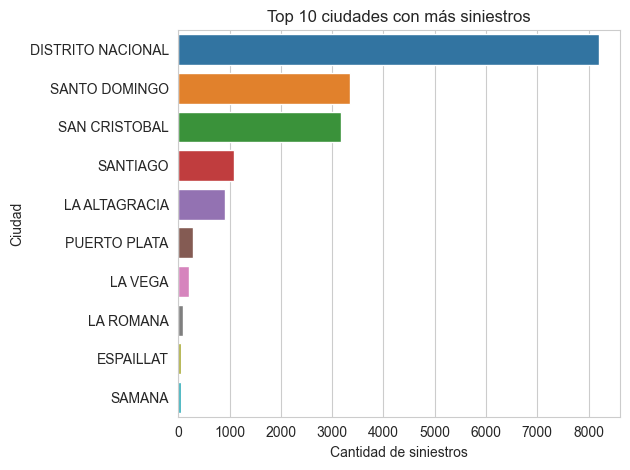

In [310]:
# Hacemos una copia del DataFrame 'df9' y lo llamamos 'data' para ver la visual
data = df9.copy()
data_clean = data.dropna(subset=['Fe_Ocurrencia'])
data_clean['month'] = data_clean['Fe_Ocurrencia'].dt.to_period('M')

sns.countplot(data=data_clean, y='DESCRIPCION', order=data_clean['DESCRIPCION'].value_counts().iloc[:10].index)
plt.title('Top 10 ciudades con más siniestros')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('Ciudad')

# Mostrar grafica
plt.tight_layout()
plt.show()

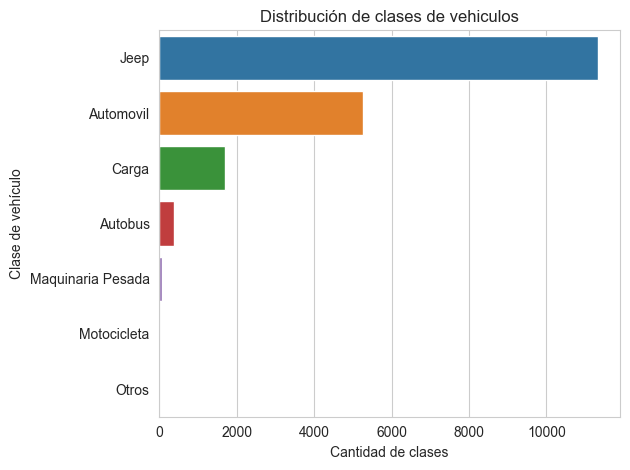

In [312]:
data = df9.copy()
data_clean = data.dropna(subset=['Fe_Ocurrencia'])
data_clean['month'] = data_clean['Fe_Ocurrencia'].dt.to_period('M')

sns.countplot(data=data_clean, y='Clase', order=data_clean['Clase'].value_counts().iloc[:10].index)
plt.title('Distribución de clases de vehiculos')
plt.xlabel('Cantidad de clases')
plt.ylabel('Clase de vehículo')

# Mostrar grafica
plt.tight_layout()
plt.show()

# Export dataset

Exportamos el DataFrame 'df9' a un archivo Excel llamado 'dataset_final.xlsx'.

In [309]:
df9.to_excel("data/dataset_cleaned.xlsx", index=False, sheet_name="BDDO_Data")